# Projeto 3: FlightOnTime ✈️ — Previsão de Atrasos de Voos


## Contexto e Objetivo

O desafio do **FlightOnTime** consiste no desenvolvimento de uma solução preditiva capaz de estimar se um voo irá **decolar no horário ou com atraso**, com base em informações operacionais e históricas.

Para este projeto, foi utilizada uma **base de dados pública da ANAC**, referente ao **ano de 2024**, contendo registros detalhados de voos comerciais no Brasil.


# 1. ETL — Extração, Transformação e Carga


## 1.1 Fonte dos Dados

Os dados utilizados neste projeto foram disponibilizados pela **ANAC**, contendo informações operacionais de voos realizados no ano de 2024.


In [ ]:

!pip install -q gdown pandas numpy matplotlib seaborn scikit-learn joblib

## 1.2 Carregamento dos Dados

Nesta etapa, os dados são carregados e inspecionados inicialmente para compreensão da estrutura, tipos de variáveis e volume de registros.


In [ ]:
!pip install gdown

import gdown

# Link direto extraído do compartilhamento público
url = "https://drive.google.com/uc?id=1M6ysDmVp_oOU7YH6e3X7JxRbqwXq2fi7"
output = "voos.zip"

gdown.download(url, output, quiet=False)

print("Download concluído:", output)


Downloading...
From: https://drive.google.com/uc?id=1M6ysDmVp_oOU7YH6e3X7JxRbqwXq2fi7
To: /content/voos.zip
100%|██████████| 23.6M/23.6M [00:00<00:00, 68.9MB/s]

Download concluído: voos.zip


## 1.3 Descompactar o arquivo
Processo de extração dos arquivos CSV



In [ ]:
import zipfile
import os

zip_path = "voos.zip"
extract_folder = "voos_raw"

# cria pasta caso não exista
os.makedirs(extract_folder, exist_ok=True)

# extrai os arquivos
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("Arquivos extraídos para:", extract_folder)
print("Conteúdo da pasta:")
os.listdir(extract_folder)


Arquivos extraídos para: voos_raw
Conteúdo da pasta:


['VRA_2024_09.csv',
 'VRA_2024_06.csv',
 'VRA_2024_04.csv',
 'VRA_2024_08.csv',
 'VRA_2024_11.csv',
 'VRA_2024_07.csv',
 'VRA_2024_03.csv',
 'VRA_2024_01.csv',
 'VRA_2024_10.csv',
 'VRA_2024_05.csv',
 'VRA_2024_02.csv',
 'VRA_2024_12.csv']

## 1.4 Leitura e Concatenação dos Arquivos CSV
Unificação dos arquivos em um único DataFrame.

In [ ]:
import pandas as pd
import glob

csv_files = glob.glob("voos_raw/*.csv")

dataframes = []

for file in csv_files:
    try:
        # tenta separador ponto e vírgula
        df_tmp = pd.read_csv(file, sep=';')
        print(f"{file}: carregado com sep=';'")
    except:
        try:
            # tenta separador vírgula
            df_tmp = pd.read_csv(file, sep=',')
            print(f"{file}: carregado com sep=','")
        except Exception as e:
            print(f"Erro ao carregar {file}: {e}")
            continue

    dataframes.append(df_tmp)

# concatena todos os DataFrames carregados
df = pd.concat(dataframes, ignore_index=True)

print("\nConcatenado com sucesso!")
print("Dimensões finais:", df.shape)

df.head()


voos_raw/VRA_2024_09.csv: carregado com sep=';'
voos_raw/VRA_2024_06.csv: carregado com sep=';'
voos_raw/VRA_2024_04.csv: carregado com sep=';'
voos_raw/VRA_2024_08.csv: carregado com sep=';'
voos_raw/VRA_2024_11.csv: carregado com sep=';'
voos_raw/VRA_2024_07.csv: carregado com sep=';'
voos_raw/VRA_2024_03.csv: carregado com sep=';'
voos_raw/VRA_2024_01.csv: carregado com sep=';'
voos_raw/VRA_2024_10.csv: carregado com sep=';'
voos_raw/VRA_2024_05.csv: carregado com sep=';'
voos_raw/VRA_2024_02.csv: carregado com sep=';'
voos_raw/VRA_2024_12.csv: carregado com sep=';'

Concatenado com sucesso!
Dimensões finais: (987868, 20)


,Sigla ICAO Empresa Aérea,Empresa Aérea,Número Voo,Código DI,Código Tipo Linha,Modelo Equipamento,Número de Assentos,Sigla ICAO Aeroporto Origem,Descrição Aeroporto Origem,Partida Prevista,Partida Real,Sigla ICAO Aeroporto Destino,Descrição Aeroporto Destino,Chegada Prevista,Chegada Real,Situação Voo,Justificativa,Referência,Situação Partida,Situação Chegada
0,AAL,"AMERICAN AIRLINES, INC.",0904,0,I,B772,288,SBGL,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO (GAL...,01/09/2024 23:00,01/09/2024 22:56,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",02/09/2024 07:35,02/09/2024 07:34,REALIZADO,NaN,2024-09-01,Antecipado,Antecipado
1,AAL,"AMERICAN AIRLINES, INC.",0905,0,I,B772,288,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",01/09/2024 21:55,01/09/2024 22:08,SBGL,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO (GAL...,02/09/2024 06:00,02/09/2024 06:27,REALIZADO,NaN,2024-09-01,Pontual,Pontual
2,AAL,"AMERICAN AIRLINES, INC.",0906,0,I,B772,288,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,01/09/2024 23:15,02/09/2024 12:07,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",02/09/2024 07:45,02/09/2024 20:16,REALIZADO,NaN,2024-09-01,Atraso > 240,Atraso > 240
3,AAL,"AMERICAN AIRLINES, INC.",0929,0,I,B77W,318,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",01/09/2024 20:50,01/09/2024 22:08,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,02/09/2024 05:15,02/09/2024 06:30,REALIZADO,NaN,2024-09-01,Atraso 60-120,Atraso 60-120
4,AAL,"AMERICAN AIRLINES, INC.",0930,0,I,B77W,318,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,01/09/2024 21:25,01/09/2024 21:26,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",02/09/2024 05:55,02/09/2024 05:44,REALIZADO,NaN,2024-09-01,Pontual,Antecipado


## 1.5 Salvamento da Versão 1 do Dataset (Pré-padronização)

Versão salva antes da alteração dos nomes das colunas, garantindo rastreabilidade.

In [ ]:
df.to_json("voos_concatenados_1.json", orient="records", force_ascii=False)


## 1.6 Passo Seguro — Pós-concatenação

Validação estrutural após carga e união dos arquivos.

In [ ]:
# Criar dataset original 100% preservado
df_raw = df.copy()

# Criar dataset de trabalho (tudo será feito aqui)
df_work = df.copy()

print("Datasets criados:")
print("df_raw  → cópia fiel e intocável")
print("df_work → dataset para limpeza, EDA e modelagem")

Datasets criados:
df_raw  → cópia fiel e intocável
df_work → dataset para limpeza, EDA e modelagem


## 1.7 Criação de Datasets de Referência

In [ ]:
df_raw = df.copy()
df_work = df.copy()

print("df_raw criado (intocável) — shape:", df_raw.shape)
print("df_work criado (dataset de trabalho) — shape:", df_work.shape)

df_raw criado (intocável) — shape: (987868, 20)
df_work criado (dataset de trabalho) — shape: (987868, 20)


## 1.8 Padronização dos Nomes das Colunas

* deixa tudo em minúsculas
* remove acentos corretamente
* troca espaços por underline
* troca hífen por underline
* mantém nomes inteiros
* não remove letras
* não corta palavras

In [ ]:
import unicodedata

def normalize_column(col):
    # remove acentos mantendo letras
    col = unicodedata.normalize("NFKD", col).encode("ASCII", "ignore").decode("utf-8")

    col = col.lower()                   # tudo minúsculo
    col = col.strip()                   # tira espaços das pontas
    col = col.replace(" ", "_")         # troca espaços por underline
    col = col.replace("-", "_")         # troca hífen por underline
    col = col.replace("/", "_")         # troca barra por underline
    return col

df_work.columns = [normalize_column(c) for c in df_work.columns]

print("📌 Colunas padronizadas:")
df_work.columns

📌 Colunas padronizadas:


Index(['sigla_icao_empresa_aerea', 'empresa_aerea', 'numero_voo', 'codigo_di',
       'codigo_tipo_linha', 'modelo_equipamento', 'numero_de_assentos',
       'sigla_icao_aeroporto_origem', 'descricao_aeroporto_origem',
       'partida_prevista', 'partida_real', 'sigla_icao_aeroporto_destino',
       'descricao_aeroporto_destino', 'chegada_prevista', 'chegada_real',
       'situacao_voo', 'justificativa', 'referencia', 'situacao_partida',
       'situacao_chegada'],
      dtype='object')

## 1.9 Salvamento da Versão 2 do Dataset (Pós-padronização)

In [ ]:
df_work.to_json(
    "voos_concatenados_2.json",
    orient="records",
    force_ascii=False
)

## 1.10 Inspeção Geral do Dataset

In [ ]:
df_work.shape

(987868, 20)

## 1.10.1 Visualização das Primeiras Linhas

In [ ]:
print("📌 Primeiras linhas do dataset:")
display(df_work.head())

📌 Primeiras linhas do dataset:


,sigla_icao_empresa_aerea,empresa_aerea,numero_voo,codigo_di,codigo_tipo_linha,modelo_equipamento,numero_de_assentos,sigla_icao_aeroporto_origem,descricao_aeroporto_origem,partida_prevista,partida_real,sigla_icao_aeroporto_destino,descricao_aeroporto_destino,chegada_prevista,chegada_real,situacao_voo,justificativa,referencia,situacao_partida,situacao_chegada
0,AAL,"AMERICAN AIRLINES, INC.",0904,0,I,B772,288,SBGL,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO (GAL...,01/09/2024 23:00,01/09/2024 22:56,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",02/09/2024 07:35,02/09/2024 07:34,REALIZADO,NaN,2024-09-01,Antecipado,Antecipado
1,AAL,"AMERICAN AIRLINES, INC.",0905,0,I,B772,288,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",01/09/2024 21:55,01/09/2024 22:08,SBGL,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO (GAL...,02/09/2024 06:00,02/09/2024 06:27,REALIZADO,NaN,2024-09-01,Pontual,Pontual
2,AAL,"AMERICAN AIRLINES, INC.",0906,0,I,B772,288,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,01/09/2024 23:15,02/09/2024 12:07,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",02/09/2024 07:45,02/09/2024 20:16,REALIZADO,NaN,2024-09-01,Atraso > 240,Atraso > 240
3,AAL,"AMERICAN AIRLINES, INC.",0929,0,I,B77W,318,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",01/09/2024 20:50,01/09/2024 22:08,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,02/09/2024 05:15,02/09/2024 06:30,REALIZADO,NaN,2024-09-01,Atraso 60-120,Atraso 60-120
4,AAL,"AMERICAN AIRLINES, INC.",0930,0,I,B77W,318,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,01/09/2024 21:25,01/09/2024 21:26,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",02/09/2024 05:55,02/09/2024 05:44,REALIZADO,NaN,2024-09-01,Pontual,Antecipado


## 1.10.2 Informações Gerais

In [ ]:
print("\n📌 Informações do dataset:")
df_work.info()


📌 Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987868 entries, 0 to 987867
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   sigla_icao_empresa_aerea      987868 non-null  object 
 1   empresa_aerea                 987868 non-null  object 
 2   numero_voo                    987868 non-null  object 
 3   codigo_di                     987868 non-null  object 
 4   codigo_tipo_linha             987867 non-null  object 
 5   modelo_equipamento            987868 non-null  object 
 6   numero_de_assentos            987868 non-null  int64  
 7   sigla_icao_aeroporto_origem   987868 non-null  object 
 8   descricao_aeroporto_origem    987868 non-null  object 
 9   partida_prevista              955925 non-null  object 
 10  partida_real                  944715 non-null  object 
 11  sigla_icao_aeroporto_destino  987868 non-null  object 
 12  descricao_aeropor

## 1.10.3 Estatísticas Iniciais

In [ ]:
print("\n📌 Estatísticas descritivas:")
display(df_work.describe(include='all'))


📌 Estatísticas descritivas:


,sigla_icao_empresa_aerea,empresa_aerea,numero_voo,codigo_di,codigo_tipo_linha,modelo_equipamento,numero_de_assentos,sigla_icao_aeroporto_origem,descricao_aeroporto_origem,partida_prevista,partida_real,sigla_icao_aeroporto_destino,descricao_aeroporto_destino,chegada_prevista,chegada_real,situacao_voo,justificativa,referencia,situacao_partida,situacao_chegada
count,987868,987868,987868,987868,987867,987868,987868.000000,987868,987868,955925,944715,987868,987868,955923,944715,987868,0.0,987868,912772,912772
unique,110,113,6677,10,5,63,NaN,385,386,109401,414698,392,393,109065,419664,3,NaN,366,6,6
top,AZU,AZUL LINHAS AÉREAS BRASILEIRAS S/A,0248,0,N,A320,NaN,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,16/04/2024 06:00,10/11/2024 12:50,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,09/02/2024 11:00,01/08/2024 15:55,REALIZADO,NaN,2024-12-20,Antecipado,Antecipado
freq,310744,310744,1534,948433,796923,156302,NaN,140952,140952,33,13,141067,141067,32,12,944715,NaN,3026,478128,527741
mean,NaN,NaN,NaN,NaN,NaN,NaN,157.660563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,70.998240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,136.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,186.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1.11 Análise de Valores Nulos (Diagnóstico)

Nesta etapa não há exclusão de registros, apenas análise exploratória.

In [ ]:
print("\n📌 Valores nulos por coluna:")
display(df_work.isnull().sum())


📌 Valores nulos por coluna:


,0
sigla_icao_empresa_aerea,0
empresa_aerea,0
numero_voo,0
codigo_di,0
codigo_tipo_linha,1
modelo_equipamento,0
numero_de_assentos,0
sigla_icao_aeroporto_origem,0
descricao_aeroporto_origem,0
partida_prevista,31943


✔️ Para modelagem

👉 Remover os registros com nulos em partida_prevista ou partida_real, com objetivo de modelagem preditiva de atraso baseada em partida prevista vs real.

---

# 2. Análise Exploratória de Dados (EDA)

### 2.1 Inspeção Inicial das Variáveis


#### 2.1.1 Cardinalidade das Colunas (Valores Únicos)

> Análise da quantidade de valores únicos por coluna, útil para identificar:
> - variáveis categóricas
> - identificadores
> - colunas com alta cardinalidade (ex.: aeroportos, companhias, códigos)

In [ ]:
print("\n📌 Colunas e quantidades de valores únicos:")
display(df_work.nunique())


📌 Colunas e quantidades de valores únicos:


,0
sigla_icao_empresa_aerea,110
empresa_aerea,113
numero_voo,6677
codigo_di,10
codigo_tipo_linha,5
modelo_equipamento,63
numero_de_assentos,224
sigla_icao_aeroporto_origem,385
descricao_aeroporto_origem,386
partida_prevista,109401


#### 2.1.2 Distribuição e Frequência da Situação do Voo

> Análise da frequência dos valores da variável `situacao_voo`, incluindo valores nulos.

In [ ]:
# Frequência dos valores da coluna situacao_voo
situacao_voo_freq = (
    df_work['situacao_voo']
    .value_counts(dropna=False)
    .reset_index()
)

situacao_voo_freq.columns = ['situacao_voo', 'quantidade']

display(situacao_voo_freq)


,situacao_voo,quantidade
0,REALIZADO,944715
1,CANCELADO,43068
2,NÃO INFORMADO,85


## 2.2 Análises de Atraso por Dimensões Operacionais


### 2.2.1 Percentual de Atraso por Número do Voo


In [ ]:
#calculo acima com taxa percentual e duas casas decimais

import pandas as pd

# 1. Converter colunas para datetime
df_work['partida_prevista'] = pd.to_datetime(
    df_work['partida_prevista'], errors='coerce'
)

df_work['partida_real'] = pd.to_datetime(
    df_work['partida_real'], errors='coerce'
)

# 2. Calcular atraso em minutos
df_work['atraso_minutos'] = (
    df_work['partida_real'] - df_work['partida_prevista']
).dt.total_seconds() / 60

# 3. Criar variável binária de atraso (> 15 minutos)
df_work['atraso_voo'] = (df_work['atraso_minutos'] > 15).astype(int)

# 4. Agrupar por número do voo
atraso_por_voo = (
    df_work
    .groupby('numero_voo')['atraso_voo']
    .agg(['count', 'mean'])
    .rename(columns={
        'count': 'total_voos',
        'mean': 'taxa_atraso'
    })
    .sort_values('total_voos', ascending=False)
)

# 5. Converter taxa de atraso para percentual (2 casas decimais)
atraso_por_voo['taxa_atraso_pct'] = (
    atraso_por_voo['taxa_atraso'] * 100
).round(2)

# 6. Visualizar resultado
atraso_por_voo.head(10)


,total_voos,taxa_atraso,taxa_atraso_pct
numero_voo,,,
0248,1534,0.074316,7.43
0506,1344,0.162946,16.29
0015,1274,0.095761,9.58
0507,1098,0.098361,9.84
0249,1096,0.055657,5.57
0016,933,0.163987,16.40
8147,931,0.094522,9.45
0926,864,0.049769,4.98
8157,839,0.038141,3.81


### 2.2.2 Taxa Média de Atraso por Voo — Período do Dia
Responde: "Qual a probabilidae média de um voo atrasar neste período do dia?"

- horários com mais voos têm mais peso
- Não há balanceamento entre as horas
- o volume domina o resultado

In [ ]:
df_work['hora_partida'] = df_work['partida_prevista'].dt.hour

#Calcular taxa de atraso por hora
atraso_por_hora = (
    df_work
    .groupby('hora_partida')['atraso_voo']
    .agg(['count', 'mean'])
    .rename(columns={
        'count': 'total_voos',
        'mean': 'taxa_atraso'
    })
    .sort_index()
)

atraso_por_hora


# Taxa de atraso por período do dia
def periodo_dia(hora):
    if 6 <= hora < 12:
        return 'Manhã'
    elif 12 <= hora < 18:
        return 'Tarde'
    else:
        return 'Noite'

df_work['periodo_dia'] = df_work['hora_partida'].apply(periodo_dia)


# Calcular taxa de atraso por período
atraso_por_periodo = (
    df_work
    .groupby('periodo_dia')['atraso_voo']
    .agg(['count', 'mean'])
    .rename(columns={
        'count': 'total_voos',
        'mean': 'taxa_atraso'
    })
    .sort_values('taxa_atraso', ascending=False)
)

atraso_por_periodo


,total_voos,taxa_atraso
periodo_dia,,
Tarde,120485,0.192978
Manhã,118762,0.134647
Noite,748621,0.035284


### 2.2.3 Taxa Média de Atraso por Voo — Horário

Responde: "Se um voo partir nesta hora do dia, qual é a chance média de ele atrasar?”

- unidade de análise: voo
- agreagação: hora por dia
- peso: cada voo conta 1 vez

In [ ]:
# Extrair hora da partida prevista
df_work['hora_partida'] = df_work['partida_prevista'].dt.hour

# Calcular taxa de atraso por hora
atraso_por_hora = (
    df_work
    .groupby('hora_partida')['atraso_voo']
    .agg(['count', 'mean'])
    .rename(columns={
        'count': 'total_voos',
        'mean': 'taxa_atraso'
    })
    .sort_index()
)

# Converter taxa para percentual (numérico) com 2 casas decimais
atraso_por_hora['taxa_atraso_pct'] = (
    atraso_por_hora['taxa_atraso'] * 100
).round(2)

# Converter índice (hora) para formato "99h00"
atraso_por_hora.index = atraso_por_hora.index.map(
    lambda x: f"{int(x):02d}h00"
)

# Ordenar do maior para o menor índice de atraso
atraso_por_hora = atraso_por_hora.sort_values(
    by='taxa_atraso_pct',
    ascending=False
)

atraso_por_hora


,total_voos,taxa_atraso,taxa_atraso_pct
hora_partida,,,
17h00,25020,0.226059,22.61
18h00,20649,0.225386,22.54
19h00,17204,0.220472,22.05
20h00,16766,0.212334,21.23
23h00,14526,0.209968,21.00
01h00,4279,0.208460,20.85
16h00,15624,0.201677,20.17
21h00,15323,0.201462,20.15
22h00,12599,0.200968,20.10


### 2.2.4 Média de Atraso por Período (Base Horária)

Responde: "Se escolher uma hora aleatória dentro dese período do dia, qual a taxa média de atraso"?

- unidade de análise(etapa 1): hora
- unidade de análise(etapa 2): periodo do dia
- peso: cada hora tem o mesmo peso

In [ ]:
# Primeiro por hora
por_hora = (
    df_work
    .groupby('hora_partida')['atraso_voo']
    .mean()
)

# Depois média das horas por período
por_hora = por_hora.reset_index()
por_hora['periodo_dia'] = por_hora['hora_partida'].apply(periodo_dia)

por_periodo_corrigido = (
    por_hora
    .groupby('periodo_dia')['atraso_voo']
    .mean()
    .mul(100)
    .round(2)
)

por_periodo_corrigido = por_periodo_corrigido.reset_index()
por_periodo_corrigido.rename(
    columns={'atraso_voo': 'taxa_atraso_pct'},
    inplace=True
)

por_periodo_corrigido


,periodo_dia,taxa_atraso_pct
0,Manhã,13.47
1,Noite,18.14
2,Tarde,19.22


### 2.3 Análises por Companhia Aérea

### 2.3.1 Quantidade de Voos por Companhia

In [ ]:
# Quantidade de voos por companhia aérea (sigla + nome)
voos_por_cia = (
    df_work
    .groupby(['sigla_icao_empresa_aerea', 'empresa_aerea'])
    .size()
    .reset_index(name='quantidade_voos')
    .sort_values(by='quantidade_voos', ascending=False)
    .reset_index(drop=True)  # 👈 remove o índice antigo
)

# Visualizar as 15 companhias com mais voos
display(voos_por_cia.head(15))


,sigla_icao_empresa_aerea,empresa_aerea,quantidade_voos
0,AZU,AZUL LINHAS AÉREAS BRASILEIRAS S/A,310744
1,TAM,TAM LINHAS AÉREAS S.A.,267505
2,GLO,GOL LINHAS AÉREAS S.A. (EX- VRG LINHAS AÉREAS ...,221737
3,ACN,AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA),25353
4,PTB,PASSAREDO TRANSPORTES AÉREOS S.A.,16864
5,ARG,AEROLINEAS ARGENTINAS S/A,11794
6,TAP,TAP - TRANSPORTES AÉREOS PORTUGUESES S/A,9597
7,LAN,LATAM AIRLINES GROUP (EX - LAN AIRLINES S/A),9092
8,CMP,COMPAÑIA PANAMEÑA DE AVIACION S.A. (COPA AIRLI...,8243
9,SID,SIDERAL LINHAS AÉREAS LTDA.,7519


## 2.3.2 Análise Global de Voos — Cancelado x Realizado

### 2.3.3 Top 10 Companhias com Mais Voos Realizados

In [ ]:
realizados_por_cia = (
    df_work[df_work['situacao_voo'] == 'REALIZADO']
    .groupby('sigla_icao_empresa_aerea')
    .size()
    .reset_index(name='quantidade_voos_realizados')
    .sort_values(by='quantidade_voos_realizados', ascending=False)
    .reset_index(drop=True)  # 👈 remove o índice antigo
)

# Exibir Top 10
display(realizados_por_cia.head(10))

,sigla_icao_empresa_aerea,quantidade_voos_realizados
0,AZU,299164
1,TAM,263469
2,GLO,218338
3,ACN,20878
4,PTB,15602
5,TAP,9496
6,LAN,9032
7,CMP,8129
8,ARG,7517
9,SID,7163


### 2.3.4 Análise da Situação de Partida por Companhia Aérea

In [ ]:
tabela_partida = df_work.pivot_table(
    index='empresa_aerea',
    columns='situacao_partida',
    values='numero_voo',
    aggfunc='count',
    fill_value=0
)

display(tabela_partida)


situacao_partida,Antecipado,Atraso 120-240,Atraso 30-60,Atraso 60-120,Atraso > 240,Pontual
empresa_aerea,,,,,,
ABSA - AEROLINHAS BRASILEIRAS S.A.,952,198,280,292,154,716
AEROLINEAS ARGENTINAS S/A,2905,65,448,191,45,2359
AEROLÍNEA DEL CARIBE S.A. - AERCARIBE,2,0,0,0,0,2
AEROSUCRE SA,10,2,2,2,1,9
AEROTRANSPORTES MAS DE CARGA S.A. DE C.V.,45,19,12,16,21,27
...,...,...,...,...,...,...
TRANSPORTES AEREOS BOLIVIANOS,1,0,0,0,0,1
TURKISH AIRLINES INC,741,111,241,160,88,953
UKRAINE AIR ALLIANCE AIRLINES,7,9,4,8,26,5


## 2.4 Visualizações Exploratórias

### 2.4.1 Top 15 Companhias com Mais Voos

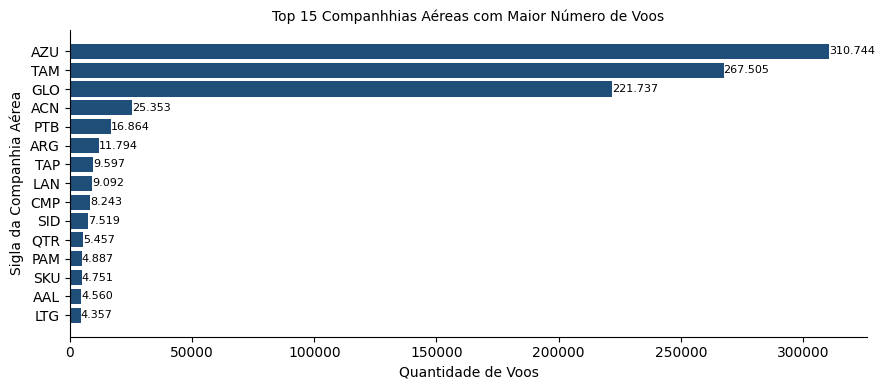

In [ ]:
import matplotlib.pyplot as plt

# Selecionar Top 15 companhias
top_15_cias = voos_por_cia.head(15)

# Definir cores
cores = ['#1F4E79'] * len(top_15_cias)

# Criar gráfico
plt.figure(figsize=(9, 4))
plt.barh(
    top_15_cias['sigla_icao_empresa_aerea'],
    top_15_cias['quantidade_voos'],
    color=cores
)

# Título e rótulos
plt.title(
    "Top 15 Companhhias Aéreas com Maior Número de Voos",
    fontsize=10
)
plt.xlabel("Quantidade de Voos")
plt.ylabel("Sigla da Companhia Aérea")

# Inverter eixo Y
plt.gca().invert_yaxis()

# Remover bordas superior e direita
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Valores nas barras
for i, valor in enumerate(top_15_cias['quantidade_voos']):
    plt.text(
        valor,
        i,
        f'{valor:,}'.replace(',', '.'),
        va='center',
        ha='left',
        fontsize=8
    )

plt.tight_layout()

# 👉 Salvar imagem
plt.savefig(
    "top_15_companhias_aereas.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


### 2.4.2 Atraso por Faixa de Horário

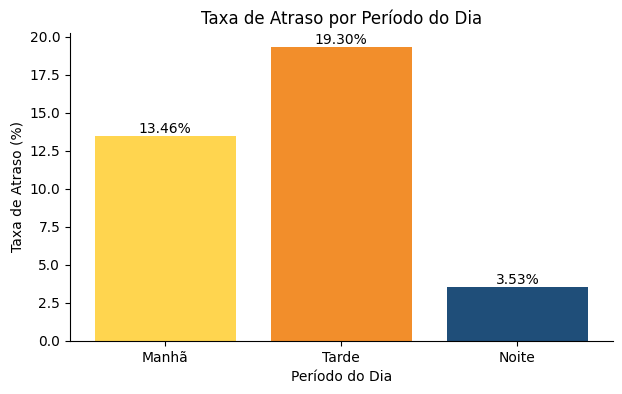

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Extrair hora da partida prevista
df_work['hora_partida'] = df_work['partida_prevista'].dt.hour

# 2. Definir período do dia
def periodo_dia(hora):
    if 6 <= hora < 12:
        return 'Manhã'
    elif 12 <= hora < 18:
        return 'Tarde'
    else:
        return 'Noite'

df_work['periodo_dia'] = df_work['hora_partida'].apply(periodo_dia)

# 3. Calcular taxa de atraso por período
atraso_por_periodo = (
    df_work
    .groupby('periodo_dia')['atraso_voo']
    .agg(['count', 'mean'])
    .rename(columns={
        'count': 'total_voos',
        'mean': 'taxa_atraso'
    })
)

# 4. Converter taxa para percentual (2 casas decimais)
atraso_por_periodo['taxa_atraso_pct'] = (
    atraso_por_periodo['taxa_atraso'] * 100
).round(2)

# 5. Reordenar períodos (ordem lógica do dia)
ordem_periodos = ['Manhã', 'Tarde', 'Noite']
atraso_por_periodo = atraso_por_periodo.reindex(ordem_periodos)

# 6. Definir cores por período
cores_periodo = {
    'Manhã': '#FFD54F',   # amarelo
    'Tarde': '#F28E2B',   # laranja
    'Noite': '#1F4E79'    # azul
}

# 7. Criar gráfico
plt.figure(figsize=(7, 4))
plt.bar(
    atraso_por_periodo.index,
    atraso_por_periodo['taxa_atraso_pct'],
    color=[cores_periodo[p] for p in atraso_por_periodo.index]
)

# 8. Títulos e rótulos
plt.title('Taxa de Atraso por Período do Dia')
plt.xlabel('Período do Dia')
plt.ylabel('Taxa de Atraso (%)')

# 9. Adicionar valores nas barras
for i, valor in enumerate(atraso_por_periodo['taxa_atraso_pct']):
    plt.text(
        i,
        valor,
        f'{valor:.2f}%',
        ha='center',
        va='bottom'
    )

# Remover borda superior e lateral direita
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 👉 Salvar imagem
plt.savefig(
    "Taxa de Atraso por Período do Dia.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


### 2.4.3 Percentual de Atrasos ≥ 20%





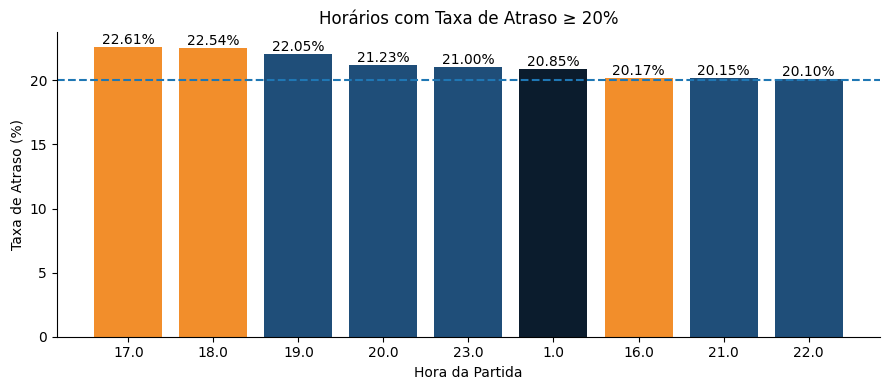

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Garantir coluna de hora
df_work['hora_partida'] = df_work['partida_prevista'].dt.hour

# 2. Calcular taxa de atraso por hora
atraso_por_hora = (
    df_work
    .groupby('hora_partida')['atraso_voo']
    .agg(['count', 'mean'])
    .rename(columns={
        'count': 'total_voos',
        'mean': 'taxa_atraso'
    })
)

# 3. Converter taxa para percentual (2 casas decimais)
atraso_por_hora['taxa_atraso_pct'] = (
    atraso_por_hora['taxa_atraso'] * 100
).round(2)

# 4. Ordenar do maior para o menor
atraso_por_hora = atraso_por_hora.sort_values(
    by='taxa_atraso_pct',
    ascending=False
)

# 5. Definir corte
corte = 20

# 6. Filtrar horários críticos
horarios_criticos = atraso_por_hora[
    atraso_por_hora['taxa_atraso_pct'] >= corte
]

# 7. Definir cores por horário
def cor_por_hora(hora):
    if hora == 1:
        return '#0B1C2D'   # madrugada
    elif hora in [16, 17, 18]:
        return '#F28E2B'   # tarde
    elif hora in [19, 20, 21, 22, 23]:
        return '#1F4E79'   # noite
    else:
        return '#A9A9A9'   # outros

cores = [cor_por_hora(h) for h in horarios_criticos.index]

# 8. Criar gráfico
plt.figure(figsize=(9, 4))
plt.bar(
    horarios_criticos.index.astype(str),
    horarios_criticos['taxa_atraso_pct'],
    color=cores
)

# 9. Linha de corte (20%)
plt.axhline(
    y=corte,
    linestyle='--'
)

# 10. Títulos e rótulos
plt.title('Horários com Taxa de Atraso ≥ 20%')
plt.xlabel('Hora da Partida')
plt.ylabel('Taxa de Atraso (%)')

# 11. Remover bordas superior e direita
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 12. Valores nas barras
for i, valor in enumerate(horarios_criticos['taxa_atraso_pct']):
    plt.text(
        i,
        valor,
        f'{valor:.2f}%',
        ha='center',
        va='bottom'
    )

plt.tight_layout()

# 👉 Salvar imagem
plt.savefig(
    "Horários com Taxa de Atraso ≥ 20%.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


### 2.4.4 Distribuição da Variável Alvo (atraso_voo)


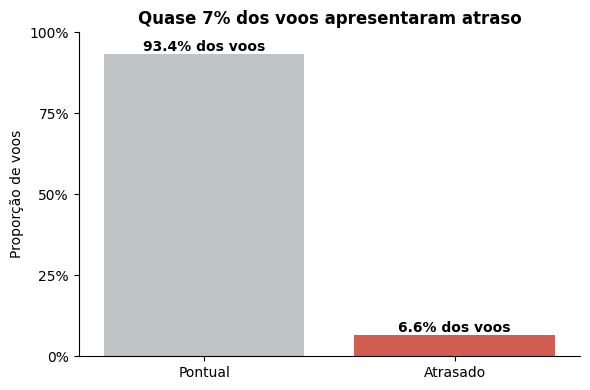

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# =========================
# Preparação dos dados
# =========================
proporcao = (
    df_work['atraso_voo']
    .value_counts(normalize=True)
    .reset_index()
)

proporcao.columns = ['atraso_voo', 'proporcao']

proporcao['status_voo'] = proporcao['atraso_voo'].map({
    0: 'Pontual',
    1: 'Atrasado'
})

# =========================
# Configuração visual
# =========================
palette = {
    'Pontual': '#bdc3c7',   # cinza
    'Atrasado': '#e74c3c'   # vermelho
}

# =========================
# Criação do gráfico (sem FutureWarning)
# =========================
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    data=proporcao,
    x='status_voo',
    y='proporcao',
    hue='status_voo',              # correção oficial seaborn
    palette=palette,
    order=['Pontual', 'Atrasado'],
    legend=False                   # evita legenda duplicada
)

# =========================
# Título com insight
# =========================
pct_atraso = proporcao.loc[
    proporcao['status_voo'] == 'Atrasado', 'proporcao'
].values[0]

plt.title(
    f'Quase {pct_atraso:.0%} dos voos apresentaram atraso',
    weight='bold'
)

plt.xlabel('')
plt.ylabel('Proporção de voos')

# =========================
# Ajustes visuais
# =========================
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.yaxis.set_major_formatter(lambda x, pos: f'{x:.0%}')

# =========================
# Anotações nas barras
# =========================
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.1%} dos voos',
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='bottom',
        fontsize=10,
        weight='bold'
    )

plt.tight_layout()

# 👉 Salvar imagem
plt.savefig(
    "Distribuição do target - atraso_voo.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


### 2.4.5 Taxa de Atraso por Hora Prevista de Partida
A análise da taxa de atraso por hora prevista revelou padrões temporais claros, com determinados períodos do dia apresentando probabilidade de atraso consistentemente acima da média global, desde que sustentados por volume operacional relevante. Esses achados justificam a inclusão da variável hora_partida como feature no modelo preditivo, permitindo capturar efeitos de acúmulo operacional e congestionamento ao longo do dia, o que contribui diretamente para o ganho de desempenho do modelo.

Destaque:
* Horários com taxa acima da média
* Horários com volume suficiente
* Pontos destacados = risco operacional real

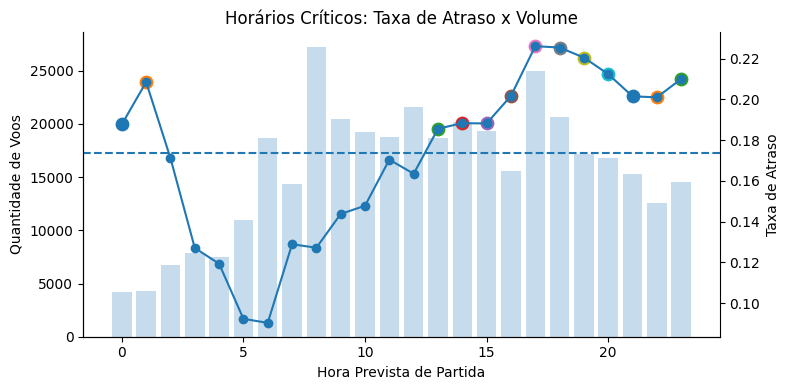

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Garantir dados válidos
df_hora = df_work.dropna(subset=['hora_partida'])

# Taxa média de atraso por hora
taxa_por_hora = (
    df_hora
    .groupby('hora_partida')['atraso_voo']
    .mean()
)

# Volume de voos por hora
volume_por_hora = (
    df_hora
    .groupby('hora_partida')
    .size()
)

# Média global
media_global = df_hora['atraso_voo'].mean()

# Volume mínimo (ex: 5% do maior volume)
volume_min = volume_por_hora.max() * 0.05

# Identificar horários críticos
horarios_criticos = (
    (taxa_por_hora > media_global) &
    (volume_por_hora >= volume_min)
)

# Criar figura
fig, ax1 = plt.subplots(figsize=(8, 4))

# Barras de volume
ax1.bar(
    volume_por_hora.index,
    volume_por_hora.values,
    alpha=0.25
)
ax1.set_xlabel('Hora Prevista de Partida')
ax1.set_ylabel('Quantidade de Voos')

# Linha de taxa
ax2 = ax1.twinx()
ax2.plot(
    taxa_por_hora.index,
    taxa_por_hora.values,
    marker='o'
)
ax2.set_ylabel('Taxa de Atraso')

# Destacar horários críticos
for hora in taxa_por_hora.index[horarios_criticos]:
    ax2.scatter(
        hora,
        taxa_por_hora.loc[hora],
        s=80
    )

# Linha média global
ax2.axhline(
    y=media_global,
    linestyle='--'
)

# Limpeza visual
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

plt.title('Horários Críticos: Taxa de Atraso x Volume')
plt.tight_layout()

# 👉 Salvar imagem
plt.savefig(
    "Horários Críticos- Taxa de Atraso x Volume.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


### 2.4.6 Top 10 Aeroportos de Origem com Maior Taxa de Atraso

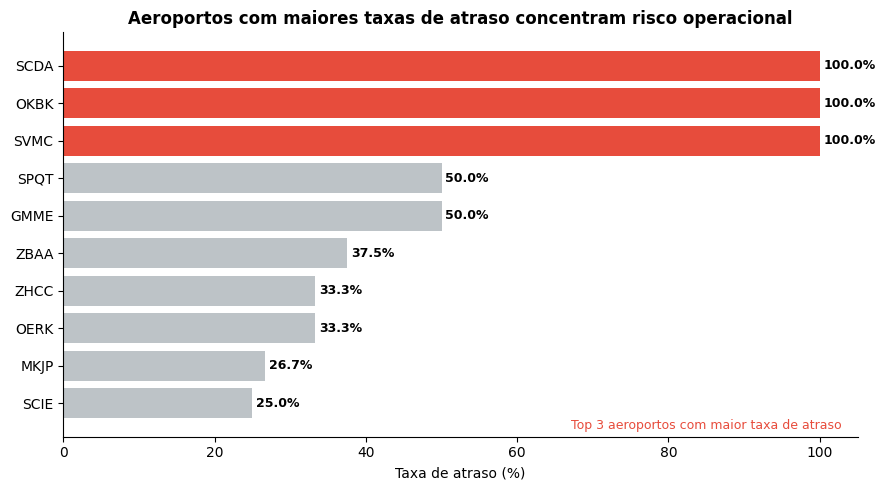

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# =========================
# Preparação dos dados
# =========================
atraso_por_aeroporto = (
    df_work
    .groupby('sigla_icao_aeroporto_origem')['atraso_voo']
    .mean()
    .mul(100)
    .round(2)
    .sort_values(ascending=True)
    .tail(10)
)

# Define cores: top 3 em vermelho
cores = ['#e74c3c' if i >= 7 else '#bdc3c7' for i in range(len(atraso_por_aeroporto))]

# =========================
# Criação do gráfico
# =========================
fig, ax = plt.subplots(figsize=(9, 5))

bars = ax.barh(
    atraso_por_aeroporto.index,
    atraso_por_aeroporto.values,
    color=cores
)

# Título com insight
ax.set_title(
    'Aeroportos com maiores taxas de atraso concentram risco operacional',
    fontsize=12,
    weight='bold'
)

ax.set_xlabel('Taxa de atraso (%)')
ax.set_ylabel('')

# Remover bordas
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Anotação dos valores
for bar in bars:
    largura = bar.get_width()
    ax.text(
        largura + 0.5,
        bar.get_y() + bar.get_height() / 2,
        f'{largura:.1f}%',
        va='center',
        fontsize=9,
        weight='bold'
    )

# Legenda implícita (sem emoji)
ax.text(
    0.98, 0.02,
    'Top 3 aeroportos com maior taxa de atraso',
    transform=ax.transAxes,
    ha='right',
    fontsize=9,
    color='#e74c3c'
)

plt.tight_layout()

# 👉 Salvar imagem
plt.savefig(
    "Top 3 aeroportos com maior taxa de atraso.png",
    dpi=300,
    bbox_inches="tight"
)


plt.show()


### 2.4.7 Top 10 Companhias Aéreas por Taxa de Atraso

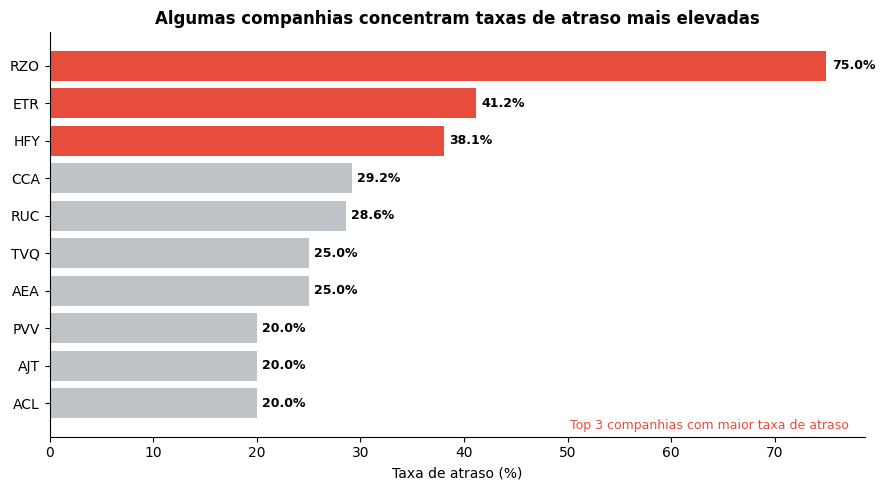

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# =========================
# Preparação dos dados
# =========================
atraso_por_companhia = (
    df_work
    .groupby('sigla_icao_empresa_aerea')['atraso_voo']
    .mean()
    .mul(100)
    .round(2)
    .sort_values(ascending=True)
    .tail(10)
)

# Define cores: top 3 companhias com maior atraso
cores = ['#e74c3c' if i >= 7 else '#bdc3c7' for i in range(len(atraso_por_companhia))]

# =========================
# Criação do gráfico
# =========================
fig, ax = plt.subplots(figsize=(9, 5))

bars = ax.barh(
    atraso_por_companhia.index,
    atraso_por_companhia.values,
    color=cores
)

# Título com insight
ax.set_title(
    'Algumas companhias concentram taxas de atraso mais elevadas',
    fontsize=12,
    weight='bold'
)

ax.set_xlabel('Taxa de atraso (%)')
ax.set_ylabel('')

# Remover bordas
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adicionar rótulos de percentual
for bar in bars:
    largura = bar.get_width()
    ax.text(
        largura + 0.5,
        bar.get_y() + bar.get_height() / 2,
        f'{largura:.1f}%',
        va='center',
        fontsize=9,
        weight='bold'
    )

# Legenda implícita (sem emoji)
ax.text(
    0.98, 0.02,
    'Top 3 companhias com maior taxa de atraso',
    transform=ax.transAxes,
    ha='right',
    fontsize=9,
    color='#e74c3c'
)

plt.tight_layout()

# 👉 Salvar imagem
plt.savefig(
    "Top 3 companhias com maior taxa de atraso.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


### 2.4.8 Taxa de Atraso por Dia da Semana

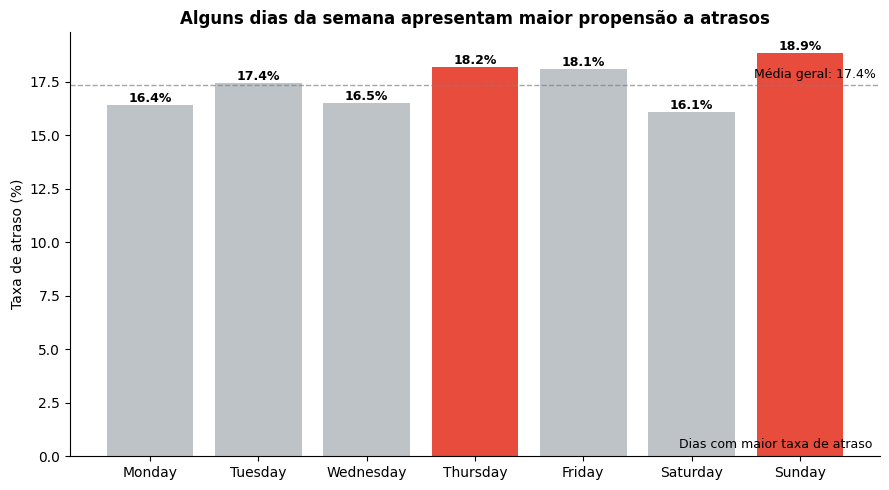

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# =========================
# Preparação dos dados
# =========================
df_data = df_work.loc[
    df_work['partida_prevista'].notna()
].copy()

df_data['dia_semana'] = df_data['partida_prevista'].dt.day_name()

# Ordem semântica dos dias
ordem_dias = [
    'Monday', 'Tuesday', 'Wednesday',
    'Thursday', 'Friday', 'Saturday', 'Sunday'
]

# Taxa de atraso por dia
atraso_por_dia = (
    df_data
    .groupby('dia_semana')['atraso_voo']
    .mean()
    .mul(100)
    .round(2)
    .reindex(ordem_dias)
)

# Média geral (linha de referência)
media_geral = atraso_por_dia.mean()

# Identificar top 2 dias com maior atraso
top_dias = atraso_por_dia.sort_values(ascending=False).head(2).index

cores = [
    '#e74c3c' if dia in top_dias else '#bdc3c7'
    for dia in atraso_por_dia.index
]

# =========================
# Criação do gráfico
# =========================
fig, ax = plt.subplots(figsize=(9, 5))

bars = ax.bar(
    atraso_por_dia.index,
    atraso_por_dia.values,
    color=cores
)

# Título com insight
ax.set_title(
    'Alguns dias da semana apresentam maior propensão a atrasos',
    fontsize=12,
    weight='bold'
)

ax.set_xlabel('')
ax.set_ylabel('Taxa de atraso (%)')

# Remover bordas
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Linha da média geral
ax.axhline(
    media_geral,
    linestyle='--',
    linewidth=1,
    color='gray',
    alpha=0.7
)

ax.text(
    len(atraso_por_dia) - 0.3,
    media_geral + 0.3,
    f'Média geral: {media_geral:.1f}%',
    ha='right',
    fontsize=9,
    color='black'
)

# Rótulos nas barras
for bar in bars:
    altura = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        altura,
        f'{altura:.1f}%',
        ha='center',
        va='bottom',
        fontsize=9,
        weight='bold'
    )

# Legenda implícita
ax.text(
    0.99, 0.02,
    'Dias com maior taxa de atraso',
    transform=ax.transAxes,
    ha='right',
    fontsize=9,
    color='black'
)

plt.tight_layout()

# 👉 Salvar imagem
plt.savefig(
    "Taxa de atraso por dia da semana.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


## 2.5 Diagnóstico de Qualidade dos Dados (EDA — Problemas Identificados)





### 2.5.1 Frequência da Coluna situacao_partida



In [ ]:
# Frequência da situação de partida
situacao_partida_freq = (
    df_work['situacao_partida']
    .value_counts(dropna=False)
    .reset_index()
)

situacao_partida_freq.columns = ['situacao_partida', 'quantidade']

# Calcular percentual
total = situacao_partida_freq['quantidade'].sum()
situacao_partida_freq['percentual'] = (
    situacao_partida_freq['quantidade'] / total * 100
).round(2)

display(situacao_partida_freq)


,situacao_partida,quantidade,percentual
0,Antecipado,478128,48.40
1,Pontual,347486,35.18
2,NaN,75096,7.60
3,Atraso 30-60,49679,5.03
4,Atraso 60-120,23631,2.39
5,Atraso 120-240,9724,0.98
6,Atraso > 240,4124,0.42


🧠 **Análise Integrada:**

- **Antecipado (478.128 voos):**  
Grande parte dos voos parte antes do horário previsto, o que indica bom desempenho operacional em determinados cenários. Esse comportamento pode estar associado a horários de menor tráfego ou maior eficiência logística.

- **Pontual (347.486 voos):**  
Uma parcela significativa dos voos decola dentro do horário planejado, evidenciando que boa parte da operação funciona conforme esperado.

- **Valores ausentes (NaN — 75.096 voos):**  
Este é o ponto crítico da análise. A ausência de status de partida pode indicar falhas de registro, inconsistências operacionais ou cancelamentos antecipados.  
Para fins de **Análise Exploratória**, esses registros são importantes para diagnosticar a qualidade dos dados, mas **não devem ser utilizados diretamente no modelo preditivo**, devendo ser filtrados no pipeline.

Além disso, ao analisar a **duração dos atrasos**, observa-se que:

- Atrasos entre **30 e 60 minutos** são os mais frequentes (≈49 mil voos).
- A frequência de atrasos **diminui conforme aumenta a duração**, caracterizando uma distribuição decrescente.
- Atrasos superiores a **240 minutos (4 horas)** são raros, representando uma fração muito pequena da amostra.

Esse padrão é consistente com operações aéreas reais, nas quais atrasos moderados ocorrem com maior frequência devido a fatores como fila de decolagem, ajustes logísticos ou condições climáticas pontuais.

### 2.5.2 Ações Analíticas Derivadas da EDA

Com base nos problemas e padrões identificados, foram definidas as seguintes ações:

- Tratar valores **NaN** como falhas operacionais e garantir sua exclusão ou tratamento adequado no pipeline.
- Diferenciar atrasos **curtos (30–60 min)** de atrasos **longos**, evitando tratá-los como eventos equivalentes.
- Criar métricas percentuais por faixa de atraso (ex.: “X% dos voos apresentam atraso superior a 60 minutos”).
- Investigar possíveis causas estruturais para atrasos longos, como infraestrutura aeroportuária, clima ou eventos externos.

Essas decisões orientam diretamente as etapas seguintes de **tratamento dos dados, engenharia de atributos e modelagem preditiva**.


---

## 3. Tratamento dos Dados (Data Cleaning)

Esta seção aplica decisões tomadas na EDA.

### 3.1 Inspeção Final de Valores do Status

In [ ]:
df_work['situacao_partida'].value_counts(dropna=False)


,count
situacao_partida,
Antecipado,478128
Pontual,347486
NaN,75096
Atraso 30-60,49679
Atraso 60-120,23631
Atraso 120-240,9724
Atraso > 240,4124


📌 Com base na análise exploratória, observamos que o atraso está associado ao período do dia, horário do voo, aeroporto de origem, companhia aérea e dia da semana. Essas variáveis serão utilizadas na modelagem preditiva.

## 3.2 Criação do Dataset Limpo — df_clean (V1)

### 3.3 Remoção de Colunas Irrelevantes ou Operacionais

Remoção da coluna Justificativa

Remoção da coluna Referência

Remoção das colunas
descricao_aeroporto_origem
descricao_aeroporto_destino

In [ ]:
# Criar dataset de trabalho (tudo será feito aqui)
df_clean = df_work.copy()

### Remove coluna Justificativa

In [ ]:
if 'justificativa' in df_clean.columns:
    df_clean = df_clean.drop(columns=['justificativa'])

### Remove coluna Referencia

In [ ]:
if 'referencia' in df_clean.columns:
    df_clean = df_clean.drop(columns=['referencia'])

### Remover colunas descricao_aeroporto_origem e descricao_aeroporto_destino

In [ ]:
if 'descricao_aeroporto_origem' in df_clean.columns:
    df_clean = df_clean.drop(columns=['descricao_aeroporto_origem'])

In [ ]:
if 'descricao_aeroporto_destino' in df_clean.columns:
    df_clean = df_clean.drop(columns=['descricao_aeroporto_destino'])

### 3.4 Filtragem de Registros Inconsistentes

Remoção de voos cancelados

Remoção de voos não informados

### Remoção de voos cancelados e não informados

In [ ]:
# Ver quantidade antes
print("Registros antes:", df_clean.shape[0])

# Remover voos cancelados ou não informados
df_clean = df_clean[
    ~df_clean['situacao_voo'].isin(['CANCELADO', 'NÃO INFORMADO'])
]

# Ver quantidade depois
print("Registros depois:", df_clean.shape[0])

Registros antes: 987868
Registros depois: 944715


---

## 4. Preparação dos Dados para Modelagem

Aqui começa a transição dados → modelo

### 4.1 Criação do Dataset Final para Modelagem — df_clean_vf

# ✔️ Pipeline modelo preditivo

### cria novo dataset - df_clean_vf (versão final)

In [ ]:
df_clean.to_json("voos_clean_v1.json", orient="records", force_ascii=False)


In [ ]:
# Criar dataset de trabalho (tudo será feito aqui)
df_clean_vf = df_clean.copy()

In [ ]:
df_clean_vf.columns

Index(['sigla_icao_empresa_aerea', 'empresa_aerea', 'numero_voo', 'codigo_di',
       'codigo_tipo_linha', 'modelo_equipamento', 'numero_de_assentos',
       'sigla_icao_aeroporto_origem', 'partida_prevista', 'partida_real',
       'sigla_icao_aeroporto_destino', 'chegada_prevista', 'chegada_real',
       'situacao_voo', 'situacao_partida', 'situacao_chegada',
       'atraso_minutos', 'atraso_voo', 'hora_partida', 'periodo_dia'],
      dtype='object')

### 4.2 Filtragem por Tipo de Linha Operacional

Manter apenas codigo_tipo_linha ∈ {I, N, X}

In [ ]:
# Agrupar e contar os valores da coluna
agrupado = (
    df_clean_vf
    .groupby('codigo_tipo_linha')
    .size()
    .reset_index(name='quantidade')
    .sort_values(by='quantidade', ascending=False)
    .reset_index(drop=True)
)

print(agrupado)


  codigo_tipo_linha  quantidade
0                 N      772412
1                 I      128947
2                 C       20618
3                 G       13604
4                 X        9134


In [ ]:
df_clean_vf = df_clean_vf[df_clean_vf['codigo_tipo_linha'].isin(['I', 'N', 'X'])]


In [ ]:
# Agrupar e contar os valores da coluna
agrupado = (
    df_clean_vf
    .groupby('codigo_tipo_linha')
    .size()
    .reset_index(name='quantidade')
    .sort_values(by='quantidade', ascending=False)
    .reset_index(drop=True)
)

print(agrupado)


  codigo_tipo_linha  quantidade
0                 N      772412
1                 I      128947
2                 X        9134


### 4.3 Remoção de Variáveis Não Utilizadas no Modelo

Remoção da coluna situacao_voo

Remoção da coluna numero_voo

Após a filtragem dos voos cancelados e com situação nula, todos os registros remanescentes apresentaram situacao_voo = REALIZADO. Assim, a coluna foi removida por não agregar informação relevante à análise.

In [ ]:
agrupado_situacao = (
    df_clean_vf
    .groupby('situacao_voo')
    .size()
    .reset_index(name='quantidade')
    .sort_values(by='quantidade', ascending=False)
)

print(agrupado_situacao)


  situacao_voo  quantidade
0    REALIZADO      910493


In [ ]:
df_clean_vf = df_clean_vf.drop(columns=['situacao_voo'])


### Remoção coluna numero_voo

In [ ]:
df_clean_vf = df_clean_vf.drop(columns=['numero_voo'])
df_clean_vf.columns

Index(['sigla_icao_empresa_aerea', 'empresa_aerea', 'codigo_di',
       'codigo_tipo_linha', 'modelo_equipamento', 'numero_de_assentos',
       'sigla_icao_aeroporto_origem', 'partida_prevista', 'partida_real',
       'sigla_icao_aeroporto_destino', 'chegada_prevista', 'chegada_real',
       'situacao_partida', 'situacao_chegada', 'atraso_minutos', 'atraso_voo',
       'hora_partida', 'periodo_dia'],
      dtype='object')

---


## 5. Engenharia de Atributos (Feature Engineering)

Seção crítica para justificar o modelo

### 5.1 Geração de Dicionários de Referência

Dicionário de empresas aéreas

Dicionário de aeroportos

Etapa responsável por extrair a relação única entre sigla_icao_empresa_aerea e empresa_aerea, gerando um arquivo JSON de referência. Após a geração do dicionário, a coluna empresa_aerea é removida do dataset principal para evitar redundância.

In [ ]:
import json

# Criar dataframe apenas com as colunas necessárias
df_empresas = (
    df_clean_vf[['sigla_icao_empresa_aerea', 'empresa_aerea']]
    .drop_duplicates()
    .sort_values('sigla_icao_empresa_aerea')
)

# Converter para dicionário
empresas_dict = dict(
    zip(
        df_empresas['sigla_icao_empresa_aerea'],
        df_empresas['empresa_aerea']
    )
)

# Salvar em arquivo JSON
with open('empresas_aereas.json', 'w', encoding='utf-8') as f:
    json.dump(empresas_dict, f, ensure_ascii=False, indent=4)


In [ ]:
df_clean_vf = df_clean_vf.drop(columns=['empresa_aerea'])

### Geração de dicionário de aeroportos
Etapa de leitura que consolida códigos ICAO de aeroportos de origem e destino e gera um arquivo JSON de referência, sem qualquer modificação no dataset operacional.

In [ ]:
# usando df_work pois dataset atual a coluna descricao_aeroporto foi removida

import json
import pandas as pd

# Criar dataframe apenas com as colunas necessárias (origem + destino)
df_aeroportos = (
    df_work[
        [
            'sigla_icao_aeroporto_origem',
            'descricao_aeroporto_origem',
            'sigla_icao_aeroporto_destino',
            'descricao_aeroporto_destino'
        ]
    ]
)

# Padronizar em duas colunas (codigo, nome)
df_aeroportos = pd.concat([
    df_aeroportos[['sigla_icao_aeroporto_origem', 'descricao_aeroporto_origem']]
        .rename(columns={
            'sigla_icao_aeroporto_origem': 'sigla_icao_aeroporto',
            'descricao_aeroporto_origem': 'descricao_aeroporto'
        }),
    df_aeroportos[['sigla_icao_aeroporto_destino', 'descricao_aeroporto_destino']]
        .rename(columns={
            'sigla_icao_aeroporto_destino': 'sigla_icao_aeroporto',
            'descricao_aeroporto_destino': 'descricao_aeroporto'
        })
])

# Remover duplicados e ordenar
df_aeroportos = (
    df_aeroportos
    .dropna()
    .drop_duplicates()
    .sort_values('sigla_icao_aeroporto')
)

# Converter para dicionário
aeroportos_dict = dict(
    zip(
        df_aeroportos['sigla_icao_aeroporto'],
        df_aeroportos['descricao_aeroporto']
    )
)

# Salvar em arquivo JSON
with open('aeroportos.json', 'w', encoding='utf-8') as f:
    json.dump(aeroportos_dict, f, ensure_ascii=False, indent=4)

### 5.2 Conversão e Padronização Temporal

Conversão segura para datetime (todas as colunas de uma vez):

Partida prevista

Partida real

Chegada prevista

Chegada real

Conversão de data e hora
As colunas temporais foram convertidas para o tipo datetime de forma segura. A partir delas, foram derivadas colunas de data, hora numérica (para análises e agregações) e hora formatada (HH:MM) para fins de visualização, garantindo integridade analítica e clareza na apresentação.

Conversão segura para datetime (todas de uma vez)

In [ ]:
import pandas as pd

# Garantir colunas datetime (seguro contra erros)
cols_datetime = [
    'partida_prevista',
    'partida_real',
    'chegada_prevista',
    'chegada_real'
]

for col in cols_datetime:
    df_clean_vf[col] = pd.to_datetime(df_clean_vf[col], errors='coerce')


Partida prevista

In [ ]:
df_clean_vf['data_partida_prevista'] = df_clean_vf['partida_prevista'].dt.date
df_clean_vf['hora_partida_prevista_num'] = df_clean_vf['partida_prevista'].dt.hour.astype('Int64')
df_clean_vf['hora_partida_prevista_fmt'] = df_clean_vf['partida_prevista'].dt.strftime('%H:%M')


Partida real

In [ ]:
df_clean_vf['data_partida_real'] = df_clean_vf['partida_real'].dt.date
df_clean_vf['hora_partida_real_num'] = df_clean_vf['partida_real'].dt.hour.astype('Int64')
df_clean_vf['hora_partida_real_fmt'] = df_clean_vf['partida_real'].dt.strftime('%H:%M')


Chegada prevista

In [ ]:
df_clean_vf['data_chegada_prevista'] = df_clean_vf['chegada_prevista'].dt.date
df_clean_vf['hora_chegada_prevista_num'] = df_clean_vf['chegada_prevista'].dt.hour.astype('Int64')
df_clean_vf['hora_chegada_prevista_fmt'] = df_clean_vf['chegada_prevista'].dt.strftime('%H:%M')


Chegada real

In [ ]:
df_clean_vf['data_chegada_real'] = df_clean_vf['chegada_real'].dt.date
df_clean_vf['hora_chegada_real_num'] = df_clean_vf['chegada_real'].dt.hour.astype('Int64')
df_clean_vf['hora_chegada_real_fmt'] = df_clean_vf['chegada_real'].dt.strftime('%H:%M')


As colunas temporais foram desmembradas em representações numérica e formatada, exigindo atualização das verificações de consistência.

In [ ]:
# =========================
# VERIFICAÇÕES - PARTIDA PREVISTA
# =========================
df_clean_vf[
    [
        'partida_prevista',
        'data_partida_prevista',
        'hora_partida_prevista_num',
        'hora_partida_prevista_fmt'
    ]
].head()


,partida_prevista,data_partida_prevista,hora_partida_prevista_num,hora_partida_prevista_fmt
0,2024-01-09 23:00:00,2024-01-09,23,23:00
1,2024-01-09 21:55:00,2024-01-09,21,21:55
2,2024-01-09 23:15:00,2024-01-09,23,23:15
3,2024-01-09 20:50:00,2024-01-09,20,20:50
4,2024-01-09 21:25:00,2024-01-09,21,21:25


In [ ]:
# =========================
# VERIFICAÇÕES - PARTIDA REAL
# =========================
df_clean_vf[
    [
        'partida_real',
        'data_partida_real',
        'hora_partida_real_num',
        'hora_partida_real_fmt'
    ]
].head()


,partida_real,data_partida_real,hora_partida_real_num,hora_partida_real_fmt
0,2024-01-09 22:56:00,2024-01-09,22,22:56
1,2024-01-09 22:08:00,2024-01-09,22,22:08
2,2024-02-09 12:07:00,2024-02-09,12,12:07
3,2024-01-09 22:08:00,2024-01-09,22,22:08
4,2024-01-09 21:26:00,2024-01-09,21,21:26


In [ ]:
# =========================
# VERIFICAÇÕES - CHEGADA PREVISTA
# =========================
df_clean_vf[
    [
        'chegada_prevista',
        'data_chegada_prevista',
        'hora_chegada_prevista_num',
        'hora_chegada_prevista_fmt'
    ]
].head()


,chegada_prevista,data_chegada_prevista,hora_chegada_prevista_num,hora_chegada_prevista_fmt
0,2024-02-09 07:35:00,2024-02-09,7,07:35
1,2024-02-09 06:00:00,2024-02-09,6,06:00
2,2024-02-09 07:45:00,2024-02-09,7,07:45
3,2024-02-09 05:15:00,2024-02-09,5,05:15
4,2024-02-09 05:55:00,2024-02-09,5,05:55


In [ ]:
# =========================
# VERIFICAÇÕES - CHEGADA REAL
# =========================
df_clean_vf[
    [
        'chegada_real',
        'data_chegada_real',
        'hora_chegada_real_num',
        'hora_chegada_real_fmt'
    ]
].head()


,chegada_real,data_chegada_real,hora_chegada_real_num,hora_chegada_real_fmt
0,2024-02-09 07:34:00,2024-02-09,7,07:34
1,2024-02-09 06:27:00,2024-02-09,6,06:27
2,2024-02-09 20:16:00,2024-02-09,20,20:16
3,2024-02-09 06:30:00,2024-02-09,6,06:30
4,2024-02-09 05:44:00,2024-02-09,5,05:44


Foram realizadas verificações explícitas das colunas derivadas de data e hora para garantir consistência de tipos e nomenclatura ao longo do pipeline.

In [ ]:
df_clean_vf.info()


<class 'pandas.core.frame.DataFrame'>
Index: 910493 entries, 0 to 987867
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   sigla_icao_empresa_aerea      910493 non-null  object        
 1   codigo_di                     910493 non-null  object        
 2   codigo_tipo_linha             910493 non-null  object        
 3   modelo_equipamento            910493 non-null  object        
 4   numero_de_assentos            910493 non-null  int64         
 5   sigla_icao_aeroporto_origem   910493 non-null  object        
 6   partida_prevista              347526 non-null  datetime64[ns]
 7   partida_real                  358973 non-null  datetime64[ns]
 8   sigla_icao_aeroporto_destino  910493 non-null  object        
 9   chegada_prevista              347413 non-null  datetime64[ns]
 10  chegada_real                  358876 non-null  datetime64[ns]
 11  situacao_partida  

### 5.3 Tratamento Essencial de Valores Nulos

Apenas variáveis críticas para modelagem
Manter apenas voos válidos para cálculo de atraso

⚠️ Decisão técnica
Para classificação supervisionada de atraso:
❌ Não dá para usar linhas sem partida_prevista
❌ Não dá para calcular atraso sem partida_real
✅ O dataset vai diminuir, e isso é esperado

👉 Melhor um dataset menor e correto do que grande e inválido.

In [ ]:
# Quantidade antes
total_antes = len(df_clean_vf)

# Remover registros sem partida prevista ou partida real
df_clean_vf = df_clean_vf.dropna(
    subset=['partida_prevista', 'partida_real']
)

# Quantidade depois
total_depois = len(df_clean_vf)

print(f"Linhas antes: {total_antes}")
print(f"Linhas depois: {total_depois}")
print(f"Removidas: {total_antes - total_depois}")
print(f"Percentual removido: {((total_antes - total_depois) / total_antes) * 100:.2f}%")


Linhas antes: 910493
Linhas depois: 347318
Removidas: 563175
Percentual removido: 61.85%


🔎 Interpretação do resultado

Dataset original: 910.493 voos -
Dataset válido para atraso: 347.318 voos -
Remoção: 61,85%

👉 Isso acontece porque:

muitos voos não têm horário real registrado;
outros não têm partida prevista operacional;
voos cancelados já tinham sido removidos

💡 347 mil registros é um volume excelente para:

Random Forest;
treino/teste estratificado;
MVP de hackathon

In [ ]:
# Remover coluna redundante (hora em float)
if 'hora_partida' in df_clean_vf.columns:
    df_clean_vf = df_clean_vf.drop(columns=['hora_partida'])

# Garantir tipo inteiro para atraso_voo (se já existir)
if 'atraso_voo' in df_clean_vf.columns:
    df_clean_vf['atraso_voo'] = df_clean_vf['atraso_voo'].astype(int)

# Conferência final da Etapa 3
df_clean_vf.info()


<class 'pandas.core.frame.DataFrame'>
Index: 347318 entries, 0 to 987861
Data columns (total 28 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   sigla_icao_empresa_aerea      347318 non-null  object        
 1   codigo_di                     347318 non-null  object        
 2   codigo_tipo_linha             347318 non-null  object        
 3   modelo_equipamento            347318 non-null  object        
 4   numero_de_assentos            347318 non-null  int64         
 5   sigla_icao_aeroporto_origem   347318 non-null  object        
 6   partida_prevista              347318 non-null  datetime64[ns]
 7   partida_real                  347318 non-null  datetime64[ns]
 8   sigla_icao_aeroporto_destino  347318 non-null  object        
 9   chegada_prevista              344465 non-null  datetime64[ns]
 10  chegada_real                  344437 non-null  datetime64[ns]
 11  situacao_partida  

### 5.4 Criação da Variável Alvo (Target)

Definição clara de atraso vs. não atraso

In [ ]:
# Recalcular atraso em minutos a partir das datas
df_clean_vf['atraso_minutos_calc'] = (
    df_clean_vf['partida_real'] - df_clean_vf['partida_prevista']
).dt.total_seconds() / 60


In [ ]:
df_clean_vf['atraso_minutos_calc'].describe()


,atraso_minutos_calc
count,347318.000000
mean,232.941745
std,3463.327176
min,-89280.000000
25%,-7.000000
50%,-1.000000
75%,9.000000
max,131147.000000


In [ ]:
# Comparar atraso_voo existente com o cálculo
df_clean_vf['atraso_voo_validacao'] = (
    df_clean_vf['atraso_minutos_calc'] > 15
).astype(int)

# Verificar divergências
divergencias = (
    df_clean_vf['atraso_voo'] != df_clean_vf['atraso_voo_validacao']
).sum()

total = len(df_clean_vf)

print(f"Divergências encontradas: {divergencias}")
print(f"Percentual divergente: {(divergencias / total) * 100:.4f}%")


Divergências encontradas: 0
Percentual divergente: 0.0000%


In [ ]:
# Remover colunas auxiliares de validação
df_clean_vf = df_clean_vf.drop(
    columns=['atraso_minutos_calc', 'atraso_voo_validacao'],
    errors='ignore'
)

# Conferência final
df_clean_vf[['atraso_minutos', 'atraso_voo']].head()


,atraso_minutos,atraso_voo
0,-4.0,0
1,13.0,0
2,43972.0,1
3,78.0,1
4,1.0,0


In [ ]:
df_clean_vf.head()

,sigla_icao_empresa_aerea,codigo_di,codigo_tipo_linha,modelo_equipamento,numero_de_assentos,sigla_icao_aeroporto_origem,partida_prevista,partida_real,sigla_icao_aeroporto_destino,chegada_prevista,...,hora_partida_prevista_fmt,data_partida_real,hora_partida_real_num,hora_partida_real_fmt,data_chegada_prevista,hora_chegada_prevista_num,hora_chegada_prevista_fmt,data_chegada_real,hora_chegada_real_num,hora_chegada_real_fmt
0,AAL,0,I,B772,288,SBGL,2024-01-09 23:00:00,2024-01-09 22:56:00,KMIA,2024-02-09 07:35:00,...,23:00,2024-01-09,22,22:56,2024-02-09,7,07:35,2024-02-09,7,07:34
1,AAL,0,I,B772,288,KMIA,2024-01-09 21:55:00,2024-01-09 22:08:00,SBGL,2024-02-09 06:00:00,...,21:55,2024-01-09,22,22:08,2024-02-09,6,06:00,2024-02-09,6,06:27
2,AAL,0,I,B772,288,SBGR,2024-01-09 23:15:00,2024-02-09 12:07:00,KMIA,2024-02-09 07:45:00,...,23:15,2024-02-09,12,12:07,2024-02-09,7,07:45,2024-02-09,20,20:16
3,AAL,0,I,B77W,318,KMIA,2024-01-09 20:50:00,2024-01-09 22:08:00,SBGR,2024-02-09 05:15:00,...,20:50,2024-01-09,22,22:08,2024-02-09,5,05:15,2024-02-09,6,06:30
4,AAL,0,I,B77W,318,SBGR,2024-01-09 21:25:00,2024-01-09 21:26:00,KMIA,2024-02-09 05:55:00,...,21:25,2024-01-09,21,21:26,2024-02-09,5,05:55,2024-02-09,5,05:44


### 5.5 Feature Engineering — Variáveis Temporais

Dia da semana

Mês

Hora da partida

Indicadores derivados

In [ ]:
# =========================
# Feature Engineering
# =========================

# 1. Componentes temporais (a partir de partida_prevista)
if 'dia_semana' not in df_clean_vf.columns:
    df_clean_vf['dia_semana'] = df_clean_vf['partida_prevista'].dt.dayofweek

if 'mes' not in df_clean_vf.columns:
    df_clean_vf['mes'] = df_clean_vf['partida_prevista'].dt.month


# 2. Criação da rota (origem_destino)
if 'rota' not in df_clean_vf.columns:
    df_clean_vf['rota'] = (
        df_clean_vf['sigla_icao_aeroporto_origem']
        + '_'
        + df_clean_vf['sigla_icao_aeroporto_destino']
    )




As features temporais foram derivadas a partir do timestamp de partida prevista, garantindo consistência entre hora numérica, dia da semana, indicador de final de semana e período do dia, com tratamento explícito de valores ausentes.


In [ ]:
import pandas as pd

# =========================
# FEATURES TEMPORAIS – PARTIDA PREVISTA
# =========================

# Garantir tipo datetime (segurança de pipeline)
df_clean_vf['partida_prevista'] = pd.to_datetime(
    df_clean_vf['partida_prevista'],
    errors='coerce'
)

# -------------------------
# Data da partida prevista
# -------------------------
df_clean_vf['data_partida_prevista'] = (
    df_clean_vf['partida_prevista']
    .dt.date
)

# -------------------------
# Hora numérica (0–23) – aceita nulos
# -------------------------
df_clean_vf['hora_partida_prevista_num'] = (
    df_clean_vf['partida_prevista']
    .dt.hour
    .astype('Int64')
)

# -------------------------
# Hora formatada (HH:MM) – para exibição
# -------------------------
df_clean_vf['hora_partida_prevista_fmt'] = (
    df_clean_vf['partida_prevista']
    .dt.strftime('%H:%M')
)

# -------------------------
# Dia da semana (0 = segunda, 6 = domingo)
# -------------------------
df_clean_vf['dia_semana'] = (
    df_clean_vf['partida_prevista']
    .dt.dayofweek
)

# -------------------------
# Indicador de final de semana
# -------------------------
df_clean_vf['is_weekend'] = (
    df_clean_vf['dia_semana']
    .isin([5, 6])
    .astype(int)
)

# -------------------------
# Período do dia (calculado)
# -------------------------
def classificar_periodo(hora):
    if pd.isna(hora):
        return None
    elif 5 <= hora < 12:
        return 'Manhã'
    elif 12 <= hora < 18:
        return 'Tarde'
    elif 18 <= hora < 23:
        return 'Noite'
    else:
        return 'Madrugada'

df_clean_vf['periodo_dia_calc'] = (
    df_clean_vf['hora_partida_prevista_num']
    .apply(classificar_periodo)
)

# =========================
# VERIFICAÇÃO
# =========================
df_clean_vf[
    [
        'partida_prevista',
        'data_partida_prevista',
        'hora_partida_prevista_num',
        'hora_partida_prevista_fmt',
        'dia_semana',
        'is_weekend',
        'periodo_dia',
        'periodo_dia_calc'
    ]
].head()


,partida_prevista,data_partida_prevista,hora_partida_prevista_num,hora_partida_prevista_fmt,dia_semana,is_weekend,periodo_dia,periodo_dia_calc
0,2024-01-09 23:00:00,2024-01-09,23,23:00,1,0,Noite,Madrugada
1,2024-01-09 21:55:00,2024-01-09,21,21:55,1,0,Noite,Noite
2,2024-01-09 23:15:00,2024-01-09,23,23:15,1,0,Noite,Madrugada
3,2024-01-09 20:50:00,2024-01-09,20,20:50,1,0,Noite,Noite
4,2024-01-09 21:25:00,2024-01-09,21,21:25,1,0,Noite,Noite


---

## 5.6 Tratamento de Variáveis Categóricas e Estratégia de Encoding

No conjunto de dados da ANAC utilizado neste projeto, foram identificadas variáveis categóricas relevantes para a tarefa de **previsão de atraso de voos**, especialmente aquelas relacionadas à **infraestrutura aeroportuária** e à **companhia aérea operadora**. As principais variáveis categóricas consideradas são:

- `sigla_icao_aeroporto_origem`  
- `sigla_icao_aeroporto_destino`  
- `sigla_icao_empresa_aerea`  

As variáveis referentes aos **aeroportos de origem e destino** apresentam **alta cardinalidade**, uma vez que envolvem um grande número de aeroportos distintos, cada um com características operacionais próprias, tais como capacidade, localização geográfica, condições climáticas recorrentes e níveis de congestionamento. Esses fatores impactam diretamente a ocorrência de atrasos, tornando essas variáveis altamente relevantes para o modelo preditivo.

Diante desse cenário, optou-se pela utilização da técnica de **Target Encoding** para as variáveis `sigla_icao_aeroporto_origem` e `sigla_icao_aeroporto_destino`. Essa técnica consiste em substituir cada categoria pela **média da variável target associada à respectiva categoria**, permitindo que o modelo capture o comportamento histórico de atraso relacionado a cada aeroporto. Além disso, o Target Encoding evita a expansão excessiva de dimensionalidade que ocorreria com a aplicação de técnicas como o One-Hot Encoding em variáveis de alta cardinalidade.

Para a variável `sigla_icao_empresa_aerea`, que apresenta **baixa cardinalidade**, será adotado o **One-Hot Encoding**, por se tratar de uma técnica simples, amplamente utilizada e adequada quando o número de categorias é reduzido, além de facilitar a interpretação dos coeficientes e importâncias no modelo.

É importante destacar que o **Target Encoding utiliza informações da variável resposta (target)** e, portanto, seu uso inadequado pode resultar em **vazamento de dados (*data leakage*)**. Dessa forma, o encoding **não será realizado nesta etapa de ETL/EDA**. O procedimento será executado **somente após a realização do split entre os conjuntos de treino e teste**, sendo o encoder **ajustado exclusivamente com os dados do conjunto de treino**. Posteriormente, o mesmo encoder será aplicado ao conjunto de teste, garantindo que nenhuma informação do target do conjunto de teste seja utilizada durante o processo de treinamento do modelo.

Essa estratégia assegura a aderência às **boas práticas de modelagem preditiva**, contribuindo para uma avaliação mais realista, consistente e confiável do desempenho do modelo.


# 6. Versionamento e Persistência dos Dados

Excelente prática — muito bem vista em avaliação

### 6.1 Salvamento da Versão Atual do Dataset

In [ ]:
df_clean_vf.to_json(
    "voos_clean_v2.json",
    orient="records",
    force_ascii=False
)

### 6.2 Criação de Dataset Final para Segurança

In [ ]:
# Criar dataset de trabalho
df_model = df_clean_vf.copy()

### Remove colunas desnecessárias para o feature engineering

❌ Colunas que NÃO devem ser usadas (data leakage ou irrelevantes)

Essas colunas não existem no momento da previsão ou entregam o resultado indiretamente:

🚫 Identificadores técnicos

codigo_di
→ Apenas ID do voo, não generaliza

🚫 Situação real do voo

situacao_partida
situacao_chegada
→ Já indicam se atrasou ou não

🚫 Variáveis diretamente ligadas ao atraso

atraso_minutos
→ É praticamente o próprio target

🚫 Horários e datas reais (aconteceram depois)

data_partida_real
hora_partida_real
data_chegada_real
hora_chegada_real

🚫 Informações de chegada (mesmo previstas)

data_chegada_prevista
hora_chegada_prevista
→ Em um MVP simples, não são necessárias
→ Podem ser incluídas depois como engenharia de atributos (ex.: duração planejada)

Essa seleção:

* evita vazamento de dados
* está 100% alinhada com a API /predict
* permite bons resultados com Logistic Regression ou Random Forest

In [ ]:
# =========================
# REMOÇÃO DE COLUNAS (DATA LEAKAGE / IRRELEVANTES)
# =========================

colunas_remover = [
    # Identificadores técnicos
    'codigo_di',

    # Situação real do voo (leakage)
    'situacao_partida',
    'situacao_chegada',

    # Variável diretamente ligada ao target
    'atraso_minutos',

    # Datas e horários reais – partida
    'partida_real',
    'data_partida_real',
    'hora_partida_real',
    'hora_partida_real_num',
    'hora_partida_real_fmt',

    # Datas e horários reais – chegada
    'chegada_real',
    'data_chegada_real',
    'hora_chegada_real',
    'hora_chegada_real_num',
    'hora_chegada_real_fmt',

    # Informações de chegada (mesmo previstas)
    'chegada_prevista',
    'data_chegada_prevista',
    'hora_chegada_prevista',
    'hora_chegada_prevista_num',
    'hora_chegada_prevista_fmt',

    # Redundância apenas para exibição
    'hora_partida_prevista_fmt'
]

# Remoção segura
df_model = df_model.drop(columns=colunas_remover, errors='ignore')

# Verificação final
df_model.info()


<class 'pandas.core.frame.DataFrame'>
Index: 347318 entries, 0 to 987861
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   sigla_icao_empresa_aerea      347318 non-null  object        
 1   codigo_tipo_linha             347318 non-null  object        
 2   modelo_equipamento            347318 non-null  object        
 3   numero_de_assentos            347318 non-null  int64         
 4   sigla_icao_aeroporto_origem   347318 non-null  object        
 5   partida_prevista              347318 non-null  datetime64[ns]
 6   sigla_icao_aeroporto_destino  347318 non-null  object        
 7   atraso_voo                    347318 non-null  int64         
 8   periodo_dia                   347318 non-null  object        
 9   data_partida_prevista         347318 non-null  object        
 10  hora_partida_prevista_num     347318 non-null  Int64         
 11  dia_semana        

### 6.3 Salvamento da Versão Final para Modelagem

In [ ]:
df_model.to_json(
    "voos_model.json",
    orient="records",
    force_ascii=False
)

# 🧾 Resumo Técnico do Projeto — FlightOnTime

Este notebook teve como objetivo **construir uma base de dados limpa, consistente e metodologicamente adequada** para o desenvolvimento de um modelo preditivo capaz de estimar, **antes da decolagem**, a probabilidade de atraso de voos comerciais no Brasil.

Todo o processo foi estruturado para refletir um **cenário real de produção**, com especial atenção à qualidade dos dados, à engenharia de atributos e à prevenção de *data leakage*.

---

## 🔄 ETL e Preparação dos Dados

Os dados utilizados neste projeto foram obtidos a partir de **arquivos CSV públicos do setor de aviação civil**, referentes ao ano de 2024.

As etapas iniciais envolveram:
- Ingestão e consolidação de múltiplos arquivos CSV;
- Padronização e normalização dos nomes das colunas;
- Criação de datasets intermediários versionados para controle e rastreabilidade.

As colunas de data e hora foram convertidas de forma **segura e centralizada** para o tipo `datetime`, possibilitando extrações temporais consistentes e evitando inconsistências entre registros.

Registros inválidos, incompletos ou operacionalmente inconsistentes foram tratados de maneira **controlada e justificada**, priorizando a preservação de informação relevante sempre que possível.

---

## 📊 Análise Exploratória de Dados (EDA)

A Análise Exploratória foi conduzida com foco em **compreender padrões operacionais e temporais associados aos atrasos**, além de diagnosticar problemas de qualidade dos dados.

Foram analisadas relações entre atraso e:
- Hora prevista de partida;
- Dia da semana;
- Mês;
- Companhia aérea;
- Aeroporto de origem.

Os resultados evidenciaram **variações significativas nas taxas de atraso** associadas a fatores temporais e operacionais, reforçando a importância dessas variáveis para a modelagem preditiva.

Os gráficos e análises foram construídos com foco em:
- Clareza visual;
- Comparabilidade entre categorias;
- Comunicação objetiva para leitura executiva e técnica.

---

## 🧠 Engenharia de Atributos (Feature Engineering)

Com base nos achados da EDA, foi realizada a criação de variáveis derivadas relevantes para o modelo, incluindo:
- Hora numérica da partida prevista;
- Dia da semana;
- Mês;
- Indicador de final de semana;
- Período do dia.

A separação entre **informações previstas** e **informações reais** foi mantida de forma rigorosa ao longo de todo o processo, garantindo coerência temporal e consistência lógica para o uso preditivo.

---

## 🚨 Prevenção de *Data Leakage*

Uma etapa central deste notebook foi a **prevenção explícita de vazamento de dados**.

Todas as variáveis que representam eventos ocorridos **após o momento da previsão** foram removidas do dataset final, incluindo:
- Horários reais de partida e chegada;
- Situação final do voo;
- Qualquer coluna diretamente associada ao atraso já ocorrido.

Essas decisões garantem que o modelo aprenda **exclusivamente a partir de informações disponíveis no momento do planejamento do voo**, reproduzindo fielmente um ambiente de produção.

---

## 🎯 Dataset Final para Modelagem

O dataset final contém apenas variáveis **conhecidas antes da decolagem**, organizadas e validadas para uso direto em modelos de machine learning.

A variável alvo (`atraso_voo`) foi definida de forma clara, isolada e consistente com o objetivo do projeto.

A base resultante está alinhada com um **cenário real de uso**, incluindo a possibilidade de integração futura com uma **API de previsão de atrasos**.

---

## ▶️ Próximo Passo

O próximo notebook, **02_Modelo_Preditivo_FlightOnTime**, é dedicado exclusivamente à construção do modelo preditivo.

Nele serão abordados:
- Pipeline de pré-processamento;
- Codificação de variáveis categóricas;
- Treinamento e validação de modelos;
- Avaliação de métricas e desempenho.

Este notebook estabelece, portanto, **a fundação técnica necessária** para o desenvolvimento de um modelo preditivo robusto, interpretável e livre de vazamento de dados.
